In [1]:
from tqdm import tqdm

import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from transformers import BertTokenizer, TFBertModel
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split


2024-07-15 12:42:48.619123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 12:42:48.638750: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 12:42:48.638781: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 12:42:48.651000: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-15 12:42:49.201696: W tensorflow/compiler/tf

In [2]:
# data_df = pd.read_csv("./MBTI/mbti-500.csv")
data_df = pd.read_csv("./mbti-500.csv")

data_df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [3]:
data_df['IE'] = data_df['type'].apply(lambda x: 0 if x[0] == 'I' else 1)
data_df['SN'] = data_df['type'].apply(lambda x: 0 if x[1] == 'S' else 1)
data_df['FT'] = data_df['type'].apply(lambda x: 0 if x[2] == 'F' else 1)
data_df['PJ'] = data_df['type'].apply(lambda x: 0 if x[3] == 'P' else 1)

data_df = data_df.drop('type', axis=1)

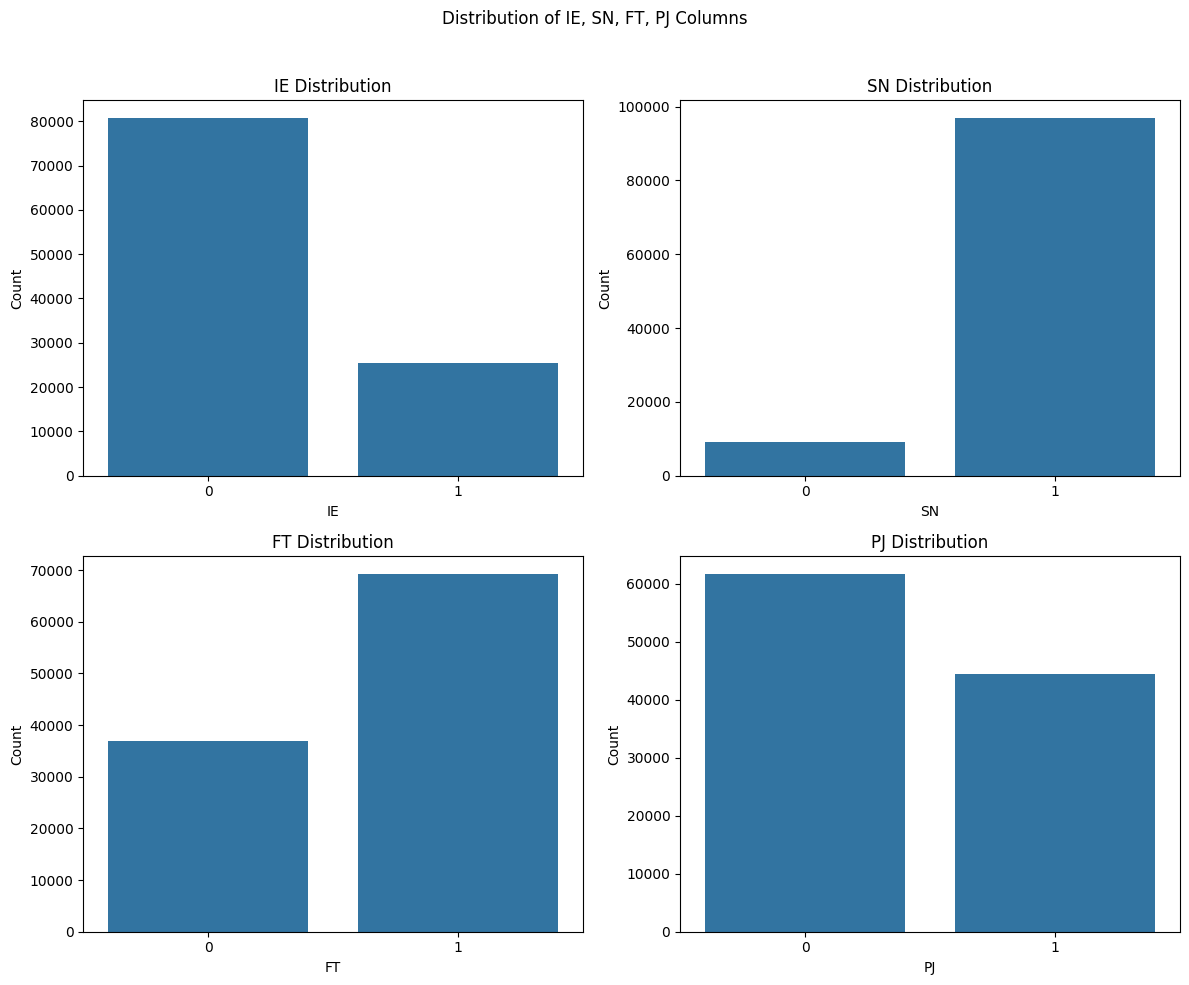

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of IE, SN, FT, PJ Columns')

sns.countplot(ax=axes[0, 0], x='IE', data=data_df)
axes[0, 0].set_title('IE Distribution')
axes[0, 0].set_xlabel('IE')
axes[0, 0].set_ylabel('Count')

sns.countplot(ax=axes[0, 1], x='SN', data=data_df)
axes[0, 1].set_title('SN Distribution')
axes[0, 1].set_xlabel('SN')
axes[0, 1].set_ylabel('Count')

sns.countplot(ax=axes[1, 0], x='FT', data=data_df)
axes[1, 0].set_title('FT Distribution')
axes[1, 0].set_xlabel('FT')
axes[1, 0].set_ylabel('Count')

sns.countplot(ax=axes[1, 1], x='PJ', data=data_df)
axes[1, 1].set_title('PJ Distribution')
axes[1, 1].set_xlabel('PJ')
axes[1, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [5]:
def auto_delete(df):
    value_counter = df.iloc[:,1::].apply(tuple, axis=1).value_counts()
    for k in value_counter.keys():
        condition = pd.Series([True] * len(df), index=df.index)
        for i, value in enumerate(k):
            condition = condition & (data_df.iloc[:,i+1] == value)

        df = df.drop(df[condition].index[1000:])

    return df

In [6]:
drop_df = auto_delete(data_df)

drop_df.head()

/tmp/ipykernel_688706/3040756772.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[condition].index[1000:])
/tmp/ipykernel_688706/3040756772.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[condition].index[1000:])
/tmp/ipykernel_688706/3040756772.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[condition].index[1000:])
/tmp/ipykernel_688706/3040756772.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[condition].index[1000:])
/tmp/ipykernel_688706/3040756772.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[condition].index[1000:])
/tmp/ipykernel_688706/3040756772.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[condition].index[1000:])
/tmp/ipykernel_688706/3040756772.py:8: UserWarning: 

,posts,IE,SN,FT,PJ
0,know intj tool use interaction people excuse a...,0,1,1,1
1,rap music ehh opp yeah know valid well know fa...,0,1,1,1
2,preferably p hd low except wew lad video p min...,0,1,1,1
3,drink like wish could drink red wine give head...,0,1,1,1
4,space program ah bad deal meing freelance max ...,0,1,1,1


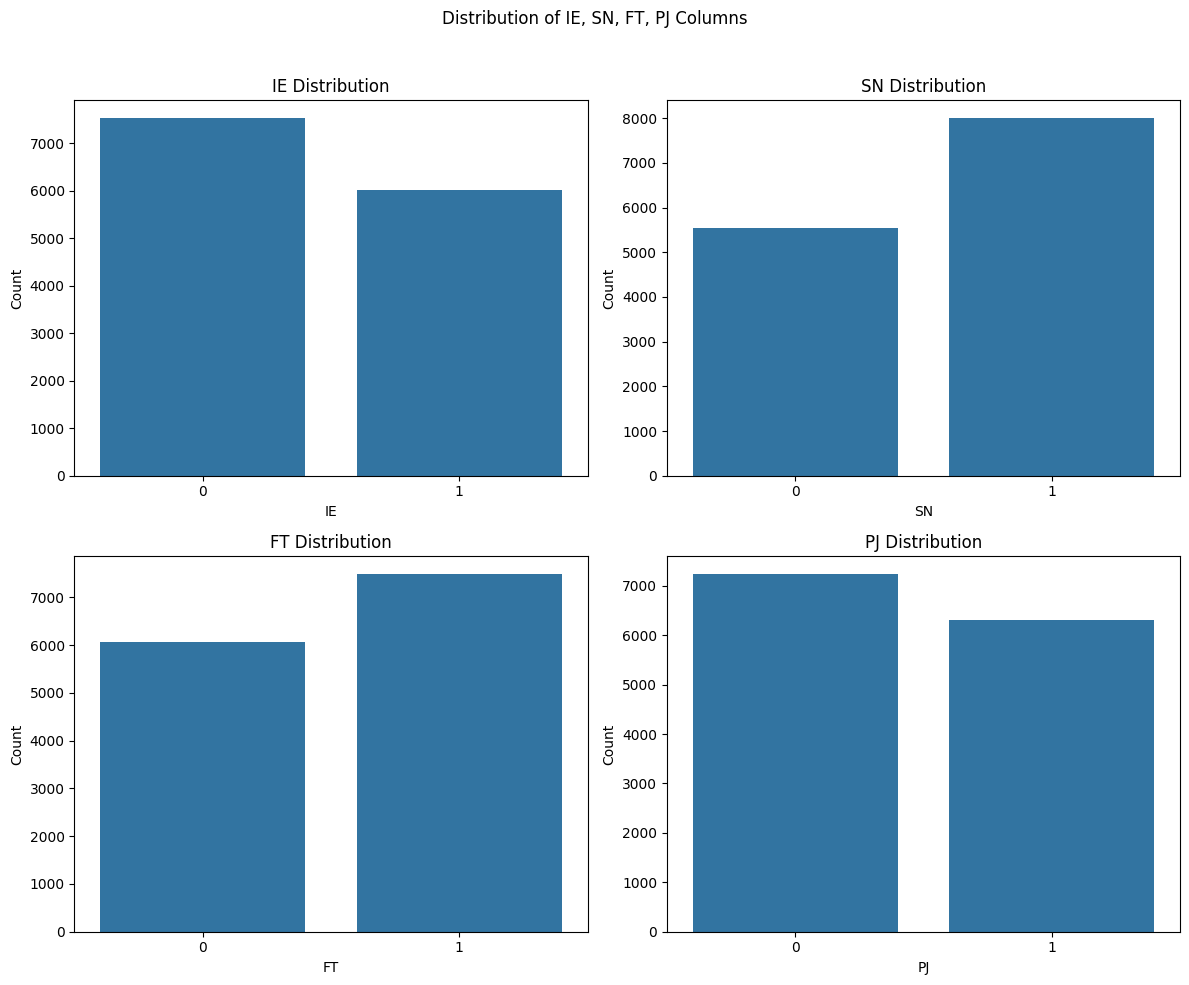

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of IE, SN, FT, PJ Columns')

sns.countplot(ax=axes[0, 0], x='IE', data=drop_df)
axes[0, 0].set_title('IE Distribution')
axes[0, 0].set_xlabel('IE')
axes[0, 0].set_ylabel('Count')

sns.countplot(ax=axes[0, 1], x='SN', data=drop_df)
axes[0, 1].set_title('SN Distribution')
axes[0, 1].set_xlabel('SN')
axes[0, 1].set_ylabel('Count')

sns.countplot(ax=axes[1, 0], x='FT', data=drop_df)
axes[1, 0].set_title('FT Distribution')
axes[1, 0].set_xlabel('FT')
axes[1, 0].set_ylabel('Count')

sns.countplot(ax=axes[1, 1], x='PJ', data=drop_df)
axes[1, 1].set_title('PJ Distribution')
axes[1, 1].set_xlabel('PJ')
axes[1, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    drop_df["posts"], drop_df.drop("posts", axis=1), test_size=0.15, random_state=42)

In [9]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(text):
    return tokenizer(text, return_tensors='tf', max_length=500, truncation=True, padding='max_length')

X_train_tensor_list = []
X_test_tensor_list = []

print("====== Start Train Encoding ======")
for row in tqdm(X_train_df):
    X_train_tensor_list.append(tokenize_function(row))

print("====== Start Test Encoding ======")
for row in tqdm(X_test_df):
    X_test_tensor_list.append(tokenize_function(row))

====== Start Train Encoding ======


  0%|          | 1/11515 [00:00<1:20:06,  2.40it/s]2024-07-13 13:17:06.685768: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 13:17:06.685942: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 13:17:06.686952: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob

====== Start Test Encoding ======


100%|██████████| 2033/2033 [00:14<00:00, 143.97it/s]


In [10]:
X_train_input_ids_list = [row['input_ids'] for row in X_train_tensor_list]
X_train_attention_mask_list = [row['attention_mask'] for row in X_train_tensor_list]

X_test_input_ids_list = [row['input_ids'] for row in X_test_tensor_list]
X_test_attention_mask_list = [row['attention_mask'] for row in X_test_tensor_list]

In [11]:
X_train_input_ids_tensor = tf.concat(X_train_input_ids_list, axis=0)
X_train_attention_mask_tensor = tf.concat(X_train_attention_mask_list, axis=0)

X_test_input_ids_tensor = tf.concat(X_test_input_ids_list, axis=0)
X_test_attention_mask_tensor = tf.concat(X_test_attention_mask_list, axis=0)

In [12]:
print(X_train_input_ids_tensor.shape)
print(X_train_attention_mask_tensor.shape)

print(X_test_input_ids_tensor.shape)
print(X_test_attention_mask_tensor.shape)

(11515, 500)
(11515, 500)
(2033, 500)
(2033, 500)


In [13]:
y_train_arr = y_train_df.to_numpy()

y_test_arr = y_test_df.to_numpy()


print(y_train_arr.shape)
print(y_test_arr.shape)

(11515, 4)
(2033, 4)


In [2]:
def create_model(bert_model):
    input_ids = tf.keras.layers.Input(shape=(500,), dtype=tf.int32, name="input_ids")
    attention_masks = tf.keras.layers.Input(shape=(500,), dtype=tf.int32, name="attention_mask")
  
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(256,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(4, activation="sigmoid")(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    return model


model = create_model(TFBertModel.from_pretrained("bert-base-uncased", from_pt=True))

2024-07-15 12:42:56.059354: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-15 12:42:56.060226: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-15 12:42:56.060402: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.BinaryCrossentropy()
# metrics = [tf.keras.metrics.Accuracy()]
metrics = [tf.keras.metrics.BinaryAccuracy()]


model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 500)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 500)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 500, 7                                       

In [16]:
# 모델 학습
hist = model.fit(
    [X_train_input_ids_tensor, X_train_attention_mask_tensor],
    y_train_arr,
    validation_data=([X_test_input_ids_tensor, X_test_attention_mask_tensor], y_test_arr),
    epochs=10,
    batch_size=16,
)

Epoch 1/10


I0000 00:00:1720876761.205507  688851 service.cc:145] XLA service 0x7f82d650fc50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720876761.205533  688851 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-07-13 13:19:21.210005: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-13 13:19:21.221837: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902
I0000 00:00:1720876761.265797  688851 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


720/720 [==============================] - 419s 534ms/step - loss: 0.4659 - binary_accuracy: 0.7604 - val_loss: 0.3020 - val_binary_accuracy: 0.8770
Epoch 2/10
720/720 [==============================] - 386s 536ms/step - loss: 0.2842 - binary_accuracy: 0.8852 - val_loss: 0.2785 - val_binary_accuracy: 0.8880
Epoch 3/10
720/720 [==============================] - 386s 536ms/step - loss: 0.2111 - binary_accuracy: 0.9180 - val_loss: 0.2534 - val_binary_accuracy: 0.9005
Epoch 4/10
720/720 [==============================] - 355s 493ms/step - loss: 0.1473 - binary_accuracy: 0.9428 - val_loss: 0.3019 - val_binary_accuracy: 0.8931
Epoch 5/10
720/720 [==============================] - 301s 418ms/step - loss: 0.1070 - binary_accuracy: 0.9618 - val_loss: 0.3799 - val_binary_accuracy: 0.8896
Epoch 6/10
720/720 [==============================] - 301s 418ms/step - loss: 0.0805 - binary_accuracy: 0.9709 - val_loss: 0.3449 - val_binary_accuracy: 0.9016
Epoch 7/10
720/720 [==============================]

In [17]:
model.save('./baseline0713_22.h5')

/home/seonwoo0808/anaconda3/envs/tens/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
test_pred = model.predict([X_test_input_ids_tensor, X_test_attention_mask_tensor])

64/64 [==============================] - 16s 249ms/step


In [41]:
test_pred = np.round(test_pred)

print(classification_report(y_test_arr, test_pred, target_names=["IE",	"SN", "FT", "PJ"]))

              precision    recall  f1-score   support

          IE       0.87      0.88      0.88       891
          SN       0.94      0.91      0.92      1192
          FT       0.92      0.92      0.92      1125
          PJ       0.93      0.81      0.87       926

   micro avg       0.92      0.88      0.90      4134
   macro avg       0.91      0.88      0.90      4134
weighted avg       0.92      0.88      0.90      4134
 samples avg       0.84      0.82      0.82      4134



/home/seonwoo0808/anaconda3/envs/tens/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/seonwoo0808/anaconda3/envs/tens/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/seonwoo0808/anaconda3/envs/tens/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c